In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import math

In [3]:


# Preprocessing function
def preprocess_text(text):
    """
    Preprocesses input text for sentiment analysis.

    Steps:
    1. Converts to lowercase
    2. Removes URLs, hashtags, special characters, numbers, and punctuations
    3. Tokenizes text
    4. Removes stop words
    5. Lemmatizes tokens

    Args:
        text (str): The raw text input.

    Returns:
        str: The cleaned and preprocessed text.
    """
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = text.lower()
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'#\S+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, numbers, and punctuations
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)


In [5]:
df = pd.read_csv('Sentiment_analysis_Data.csv')

# Preprocess text
df['cleaned_text'] = df['text'].apply(preprocess_text)


In [7]:
df.head()

,text,sentiment_score,cleaned_text
0,Hidden fees on loans are just unethical! #Fina...,-0.81,hidden fee loan unethical budgeting
1,Predatory loans are a trap—know the risks befo...,0.34,predatory loan trapknow risk signing spending ...
2,Did you know investing $100 monthly can grow t...,0.11,know investing monthly grow k year financial p...
3,"Surprisingly, budgeting apps can save up to 20...",0.99,surprisingly budgeting apps save expense budge...
4,Imagine achieving financial independence by 40...,-0.14,imagine achieving financial independence inves...


In [9]:

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['cleaned_text']).toarray()


In [11]:

# Target variable
sentiment_scores = df['sentiment_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, sentiment_scores, test_size=0.3, random_state=42)


In [13]:

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


In [15]:
df_pred = pd.DataFrame({
    'Actual': y_test
})
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    df_pred[name+"_pred"] = predictions
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = math.sqrt(mse)
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} MAE: {mae:.4f}")
    print(f"{name} RMSE: {rmse:.4f}")


Linear Regression MSE: 0.3330
Linear Regression MAE: 0.4866
Linear Regression RMSE: 0.5771
Decision Tree MSE: 0.5903
Decision Tree MAE: 0.6244
Decision Tree RMSE: 0.7683
Random Forest MSE: 0.4608
Random Forest MAE: 0.5557
Random Forest RMSE: 0.6789
Gradient Boosting MSE: 0.3463
Gradient Boosting MAE: 0.4992
Gradient Boosting RMSE: 0.5885


In [17]:
df_pred.head()

,Actual,Linear Regression_pred,Decision Tree_pred,Random Forest_pred,Gradient Boosting_pred
1116,0.23,-0.224831,0.0300,-0.122595,-0.194593
1368,-0.67,0.150169,0.4800,0.341720,0.125821
422,-0.07,0.124290,0.1975,0.141057,0.109590
413,-0.63,0.130637,0.3000,0.325215,0.205765
451,-0.26,0.044700,0.8100,0.477980,0.261153


In [19]:

# Example prediction
new_text = ["The movie was an absolute not masterpiece, I did not loved any moment of it!"]
new_text_features = vectorizer.transform([preprocess_text(text) for text in new_text]).toarray()
rf_predicted_sentiment = models["Random Forest"].predict(new_text_features)
gb_predicted_sentiment = models["Gradient Boosting"].predict(new_text_features)
dt_predicted_sentiment = models["Decision Tree"].predict(new_text_features)
lr_predicted_sentiment = models["Linear Regression"].predict(new_text_features)
print(f"Predicted Sentiment (Random Forest): {rf_predicted_sentiment[0]:.2f}")
print(f"Predicted Sentiment (Gradient Boosting): {gb_predicted_sentiment[0]:.2f}")
print(f"Predicted Sentiment (Decision Tree): {dt_predicted_sentiment[0]:.2f}")
print(f"Predicted Sentiment (Linear Regression): {lr_predicted_sentiment[0]:.2f}")


Predicted Sentiment (Random Forest): -0.08
Predicted Sentiment (Gradient Boosting): -0.00
Predicted Sentiment (Decision Tree): -0.29
Predicted Sentiment (Linear Regression): 2.09


In [21]:
# help(pd.DataFrame)

import matplotlib.pyplot as plt

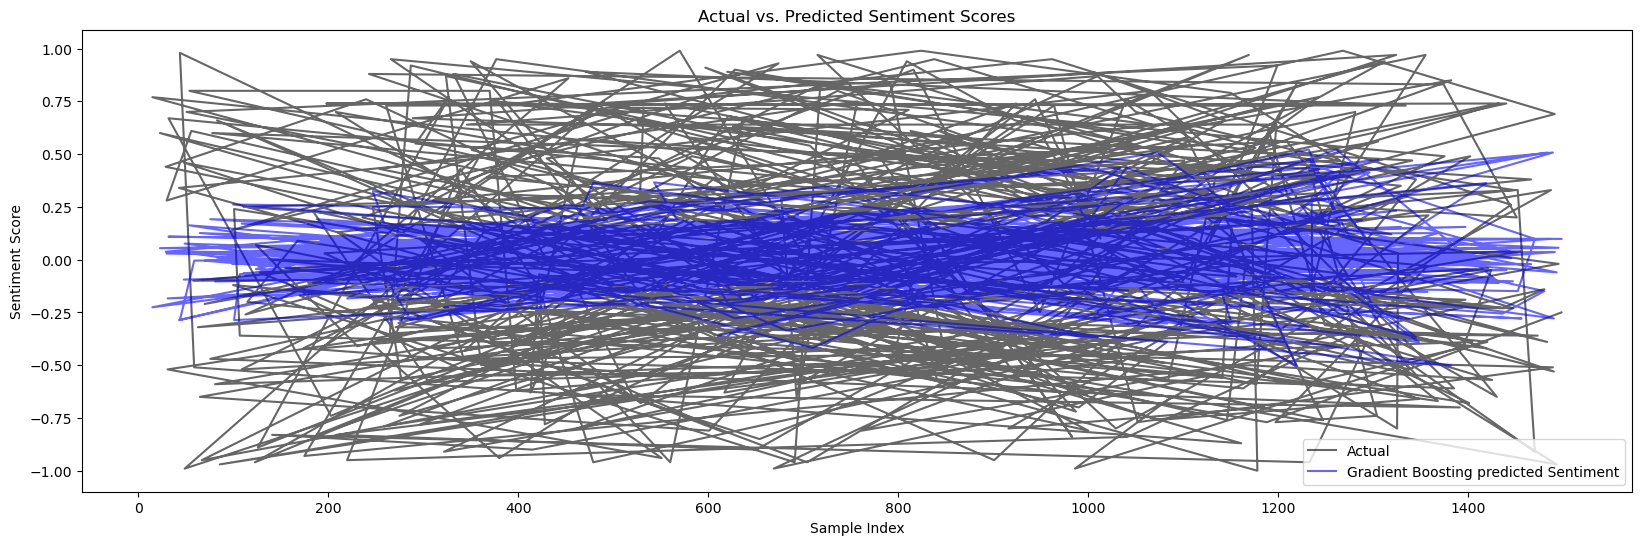

In [55]:
plt.figure(figsize=(20, 6))

plt.plot(df_pred.head(500)['Actual'], color='black', label='Actual', alpha=0.6)
plt.plot(df_pred.head(500)['Gradient Boosting_pred'], color='blue', label='Gradient Boosting predicted Sentiment', alpha=0.6)
# plt.plot(df_pred.head(500)['Linear Regression_pred'], color='green', label='Linear Regression predicted Sentiment', linewidth=1.5)
# plt.plot(df_pred.head(500)['Decision Tree_pred'], color='red', label='Decision Tree Predicted Sentiment', linewidth=1.5)
# plt.plot(df_pred.head(500)['Random Forest_pred'], color='pink', label='Random Forest_pred', linewidth=1.5)

# Add labels, legend, and title
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.legend()
plt.show()

In [25]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.37391128,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
from textblob import TextBlob

In [29]:
TextBlob("The movie was very good, I do not felt it is too long and dragged in some parts.").sentiment

Sentiment(polarity=0.42999999999999994, subjectivity=0.5900000000000001)

In [31]:
df['tb_pred'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [33]:
df.head()

,text,sentiment_score,cleaned_text,tb_pred
0,Hidden fees on loans are just unethical! #Fina...,-0.81,hidden fee loan unethical budgeting,-0.208333
1,Predatory loans are a trap—know the risks befo...,0.34,predatory loan trapknow risk signing spending ...,0.000000
2,Did you know investing $100 monthly can grow t...,0.11,know investing monthly grow k year financial p...,0.000000
3,"Surprisingly, budgeting apps can save up to 20...",0.99,surprisingly budgeting apps save expense budge...,0.700000
4,Imagine achieving financial independence by 40...,-0.14,imagine achieving financial independence inves...,0.000000


In [35]:
mse = mean_squared_error(df['sentiment_score'], df['tb_pred'])
mse

0.36699129871970065

In [37]:
mae = mean_absolute_error(df['sentiment_score'], df['tb_pred'])
mae

0.5140459908609908

In [39]:
# df.tail(20)

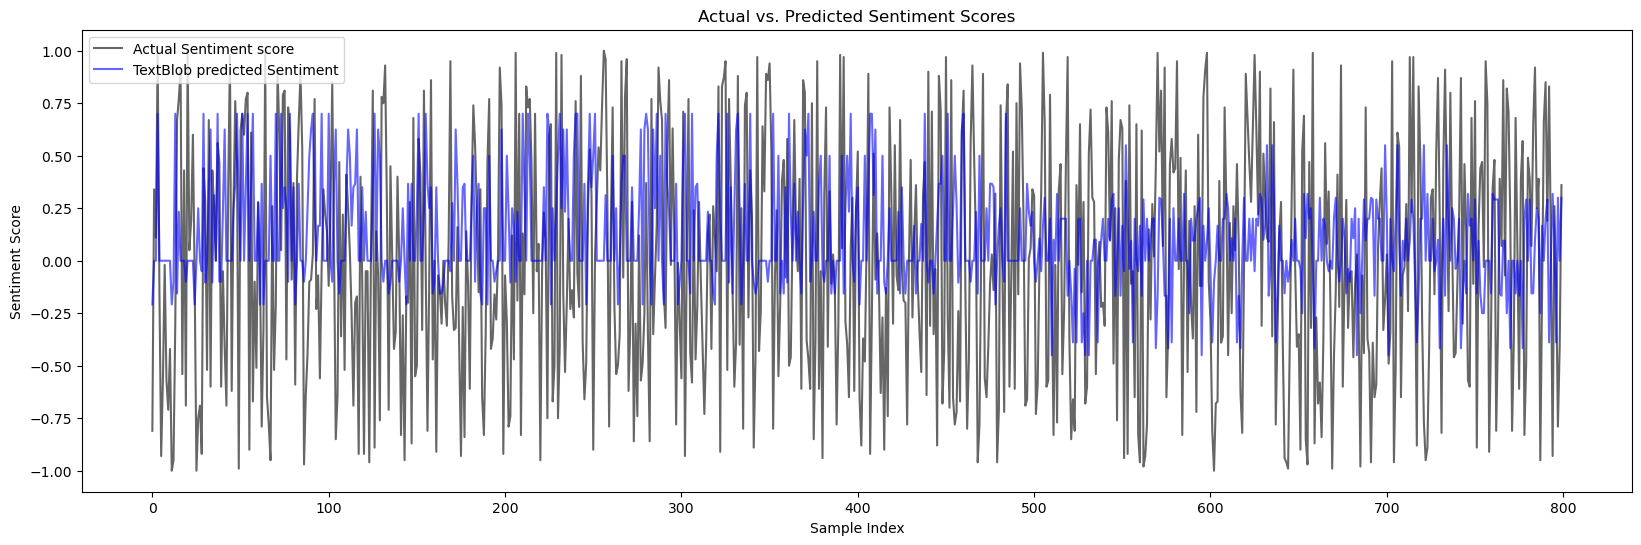

In [53]:
plt.figure(figsize=(20, 6))

plt.plot(df.head(800)['sentiment_score'], color='black', label='Actual Sentiment score', alpha=0.6)
plt.plot(df.head(800)['tb_pred'], color='blue', label='TextBlob predicted Sentiment', alpha=0.6)


# Add labels, legend, and title
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.legend()
plt.show()

In [113]:
def classify_sentiment(score):
    if score>=-0.25 and score<=0.25:
        return 'Neutral'
    elif score>0.25:
        return 'Positive'
    else:
        return 'Negative'

In [115]:
df['sentiment_class'] = df['sentiment_score'].apply(lambda x: classify_sentiment(x))
df.head()

,text,sentiment_score,cleaned_text,tb_pred,sentiment_class
0,Hidden fees on loans are just unethical! #Fina...,-0.81,hidden fee loan unethical budgeting,-0.208333,Negative
1,Predatory loans are a trap—know the risks befo...,0.34,predatory loan trapknow risk signing spending ...,0.000000,Positive
2,Did you know investing $100 monthly can grow t...,0.11,know investing monthly grow k year financial p...,0.000000,Neutral
3,"Surprisingly, budgeting apps can save up to 20...",0.99,surprisingly budgeting apps save expense budge...,0.700000,Positive
4,Imagine achieving financial independence by 40...,-0.14,imagine achieving financial independence inves...,0.000000,Neutral


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [117]:
# Install required packages
# !pip install transformers torch

# from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Function to calculate sentiment score
def get_sentiment_score(text):
    # Encode the input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Apply softmax to get probabilities
    probs = softmax(outputs.logits, dim=-1)
    
    # Sentiment labels
    labels = ['negative', 'neutral', 'positive']
    
    # Get sentiment score (probabilities for each sentiment)
    sentiment_scores = {labels[i]: probs[0][i].item() for i in range(len(labels))}
    
    return sentiment_scores

# Example usage
text = "The stock price of the company is increasing rapidly, and its a good sign."
sentiment = get_sentiment_score(text)
print(sentiment)


{'negative': 0.9423137307167053, 'neutral': 0.014650704339146614, 'positive': 0.04303552582859993}


In [139]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

# sentences = ["there is a shortage of capital, and we need extra financing",  
#              "growth is strong and we have plenty of liquidity", 
#              "there are doubts about our finances", 
#              "profits are flat", "The stock price of the company is increasing rapidly"]
# print(results)

Device set to use cpu


In [121]:

results = nlp(df.head(500)['cleaned_text'].values.tolist())
# results['text'] = df.head(20)['text']
# result['sentiment_score']
rs = pd.DataFrame(results)
rs['text'] = df.head(500)['cleaned_text'].values.tolist()
rs['sentiment_score']=  df.head(500)['sentiment_score'].values.tolist()
rs['sentiment_class']=  df.head(500)['sentiment_class'].values.tolist()


In [122]:
rs.head()

,label,score,text,sentiment_score,sentiment_class
0,Neutral,0.697294,hidden fee loan unethical budgeting,-0.81,Negative
1,Negative,0.996640,predatory loan trapknow risk signing spending ...,0.34,Positive
2,Neutral,0.984565,know investing monthly grow k year financial p...,0.11,Neutral
3,Positive,0.997189,surprisingly budgeting apps save expense budge...,0.99,Positive
4,Positive,0.999617,imagine achieving financial independence inves...,-0.14,Neutral


In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


<Figure size 2000x600 with 0 Axes>

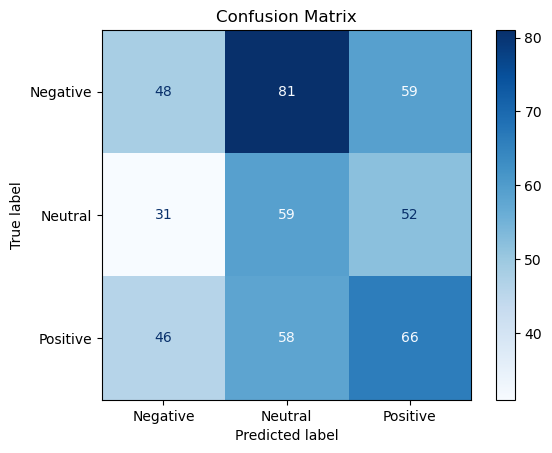

In [143]:
plt.figure(figsize=(20, 6))
# Compute confusion matrix
cm = confusion_matrix(rs['sentiment_class'], rs['label'])

# Determine the unique class labels from the data
unique_classes = sorted(set(rs['sentiment_class']) | set(rs['label']))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [129]:
rs['label'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [131]:
rs['sentiment_class'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [133]:
import seaborn as sns

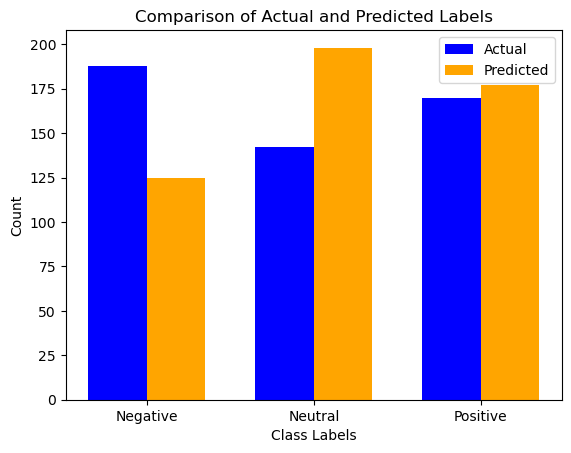

In [151]:

# Count the occurrences of each class
actual_counts = rs['sentiment_class'].value_counts().sort_index()
predicted_counts = rs['label'].value_counts().sort_index()

# Ensure all classes are included in both actual and predicted counts
all_classes = sorted(set(actual_counts.index).union(set(predicted_counts.index)))
actual_counts = actual_counts.reindex(all_classes, fill_value=0)
predicted_counts = predicted_counts.reindex(all_classes, fill_value=0)

# Plot side-by-side bar chart
x = np.arange(len(all_classes))  # the label locations
width = 0.35  # the width of the bars

# plt.figure(figsize=(10, 6))
plt.bar(x - width/2, actual_counts, width=width, label='Actual', color='blue')
plt.bar(x + width/2, predicted_counts, width=width, label='Predicted', color='orange')

# Add labels, title, and legend
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.xticks(ticks=x, labels=all_classes)
plt.legend()

plt.show()

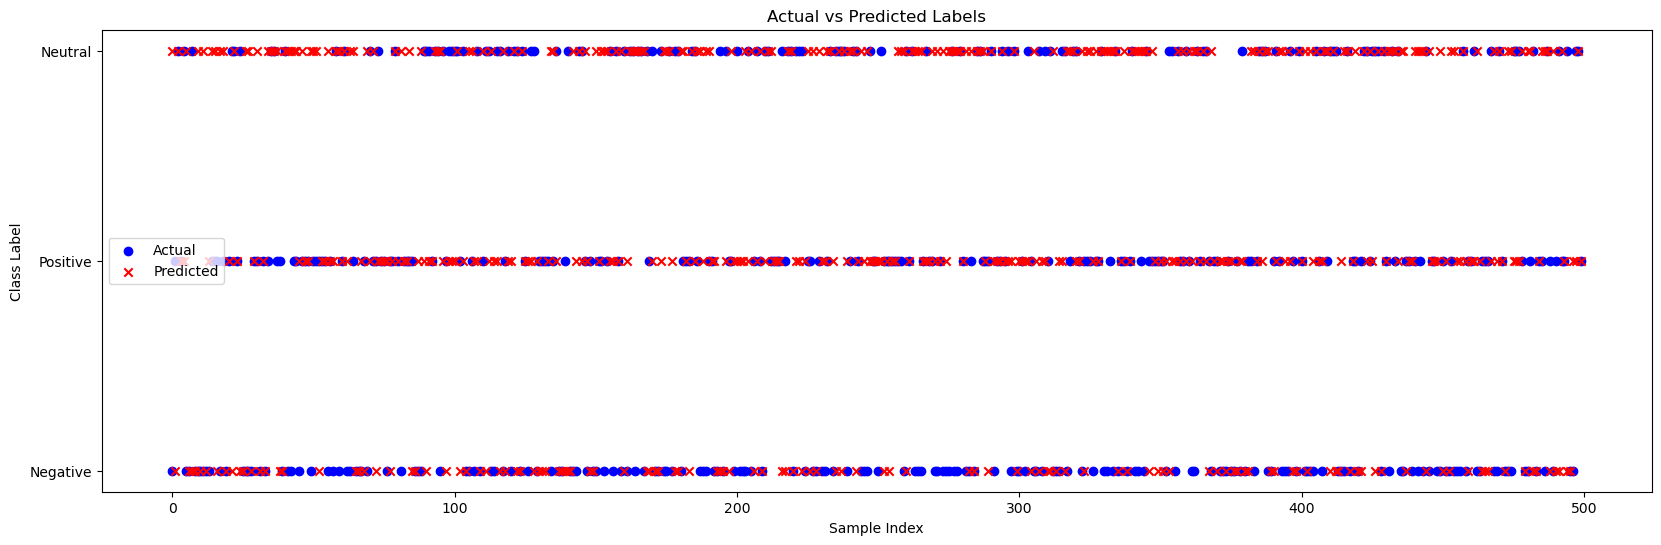

In [147]:
plt.figure(figsize=(20, 6))
# Create scatter plot
plt.scatter(range(len(rs['sentiment_class'])), rs['sentiment_class'], color='blue', label='Actual', marker='o')
plt.scatter(range(len(rs['label'])), rs['label'], color='red', label='Predicted', marker='x')

plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()

In [156]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load a pre-trained BERT model and tokenizer for sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a pipeline for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu


In [158]:

# Example sentences
sentences = [
    "This product is amazing! I absolutely love it.",
    "The experience was okay, but it could have been better.",
    "I am extremely disappointed with this service."
]

# Perform sentiment analysis
results = sentiment_pipeline(sentences)

# Display the results
for sentence, result in zip(sentences, results):
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}\n")


Sentence: This product is amazing! I absolutely love it.
Sentiment: 5 stars, Score: 0.9667

Sentence: The experience was okay, but it could have been better.
Sentiment: 3 stars, Score: 0.7903

Sentence: I am extremely disappointed with this service.
Sentiment: 1 star, Score: 0.5880



In [160]:
def classify_sentiment_bert(label):
    if label=='3 stars':
        return 'Neutral'
    elif label=='4 stars' or label=='5 stars':
        return 'Positive'
    else:
        return 'Negative'

In [162]:

results_bert = sentiment_pipeline(df.head(500)['cleaned_text'].values.tolist())
# results['text'] = df.head(20)['text']
# result['sentiment_score']



In [168]:
rs_bert = pd.DataFrame(results_bert)
rs_bert['text'] = df.head(500)['cleaned_text'].values.tolist()
rs_bert['label'] = rs_bert['label'].apply(lambda x: classify_sentiment_bert(x))
rs_bert['sentiment_score']=  df.head(500)['sentiment_score'].values.tolist()
rs_bert['sentiment_class']=  df.head(500)['sentiment_class'].values.tolist()

<Figure size 2000x600 with 0 Axes>

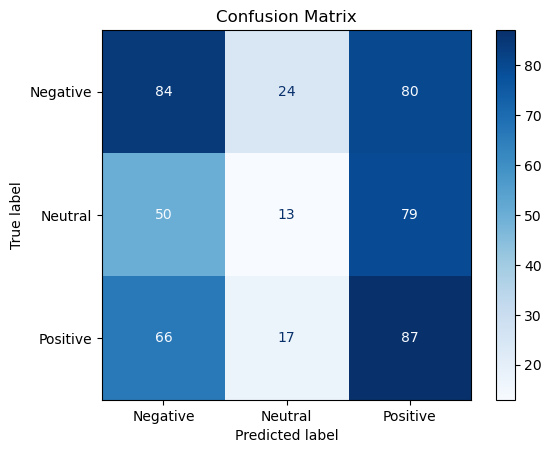

In [170]:
# Confision matrix BERT

plt.figure(figsize=(20, 6))
# Compute confusion matrix
cm = confusion_matrix(rs_bert['sentiment_class'], rs_bert['label'])

# Determine the unique class labels from the data
unique_classes = sorted(set(rs_bert['sentiment_class']) | set(rs_bert['label']))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


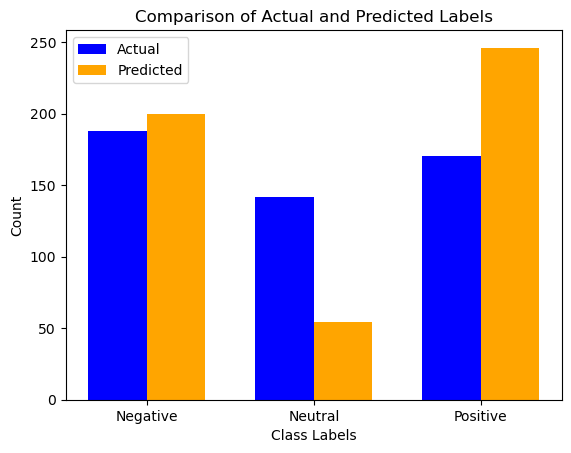

In [172]:

# Count the occurrences of each class
actual_counts = rs_bert['sentiment_class'].value_counts().sort_index()
predicted_counts = rs_bert['label'].value_counts().sort_index()

# Ensure all classes are included in both actual and predicted counts
all_classes = sorted(set(actual_counts.index).union(set(predicted_counts.index)))
actual_counts = actual_counts.reindex(all_classes, fill_value=0)
predicted_counts = predicted_counts.reindex(all_classes, fill_value=0)

# Plot side-by-side bar chart
x = np.arange(len(all_classes))  # the label locations
width = 0.35  # the width of the bars

# plt.figure(figsize=(10, 6))
plt.bar(x - width/2, actual_counts, width=width, label='Actual', color='blue')
plt.bar(x + width/2, predicted_counts, width=width, label='Predicted', color='orange')

# Add labels, title, and legend
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.xticks(ticks=x, labels=all_classes)
plt.legend()

plt.show()

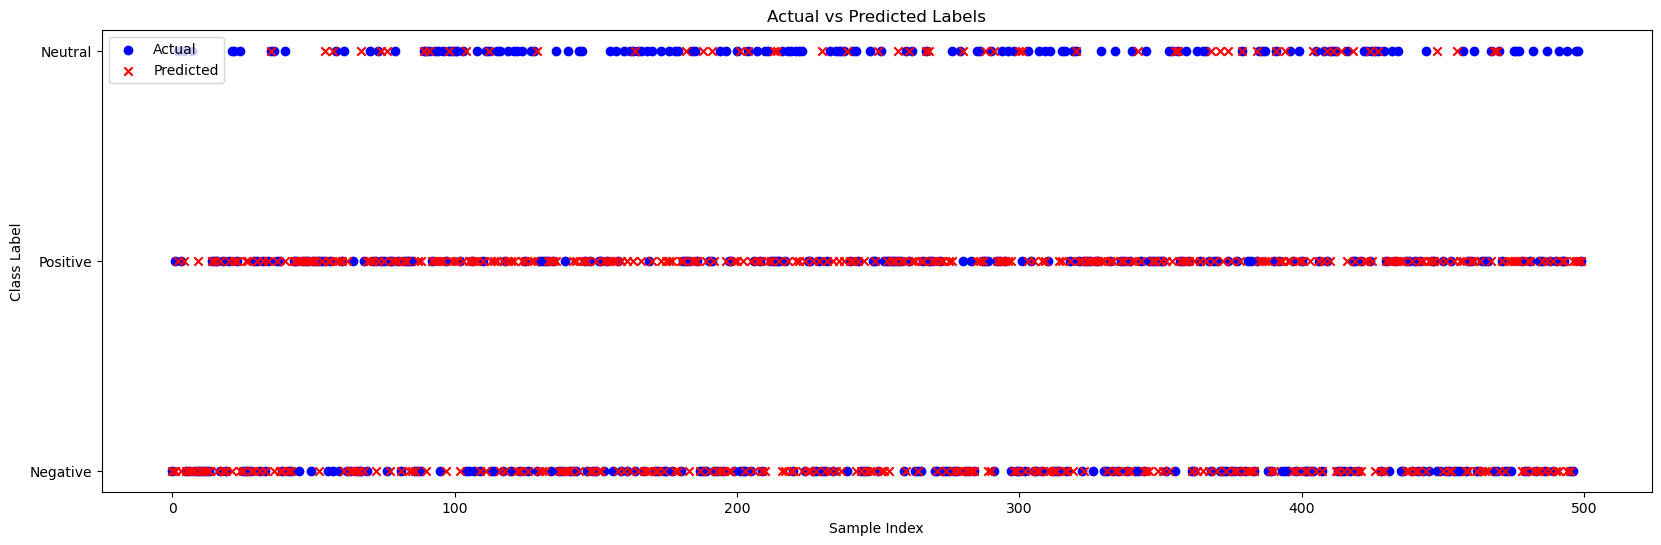

In [174]:
plt.figure(figsize=(20, 6))
# Create scatter plot
plt.scatter(range(len(rs_bert['sentiment_class'])), rs_bert['sentiment_class'], color='blue', label='Actual', marker='o')
plt.scatter(range(len(rs_bert['label'])), rs_bert['label'], color='red', label='Predicted', marker='x')

plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()